In [1]:
from index import index
import numpy as np
import collections
from matplotlib import pyplot as plt
import numpy as np

In [2]:
a = index("")

Index built in 0.4706399440765381 seconds.
Converting Collection of Documents to Vectors finished in 0.12015461921691895 seconds


# ROCCHIO

In [3]:
def rocchio(query_terms, pos_feedback, neg_feedback, alpha, beta, gamma, q):
    relevant_doc_vecs = [np.array(a.docToVec[i]) for i in pos_feedback]
    non_relevant_doc_vecs = [np.array(a.docToVec[i]) for i in neg_feedback]

    if len(relevant_doc_vecs) == 0 and len(non_relevant_doc_vecs) == 0:
        new_query = alpha*q
    elif len(relevant_doc_vecs) == 0:
        new_query = alpha*q - gamma*(1/len(non_relevant_doc_vecs))*(sum(non_relevant_doc_vecs))
    elif len(non_relevant_doc_vecs) == 0:
        new_query = alpha*q + beta*(1/len(relevant_doc_vecs))*(sum(relevant_doc_vecs)) 
    else:
        new_query = alpha*q + beta*(1/len(relevant_doc_vecs))*(sum(relevant_doc_vecs)) - gamma*(1/len(non_relevant_doc_vecs))*(sum(non_relevant_doc_vecs))
    return new_query

initial_query_vector = np.array(a.get_query_vector(["a", "cat", "jumped"]))
print(a.exact_query(["a", "cat", "jumped"], 10))

initial_query_vector = rocchio(query_terms=["a", "cat", "jumped"], pos_feedback=[136], neg_feedback=[], alpha=1.0, beta=0.75, gamma=0.15, q= initial_query_vector)

Query executed in 1.0799312591552734 seconds.
[136, 130, 274, 63, 98, 200, 353, 313, 17, 18]


# PART C

In [4]:
qId1 = 6
qId2 = 9
qId3 = 12

In [5]:
def get_queue(path):
    idToQueue = collections.defaultdict(list)

    with open(path) as file:
        line = file.readline()
        while line:
            words = line.split()
            if words and words[0] == "*STOP":
                break
            if words and words[0] == "*FIND":
                query_id = int(words[1])
            else:
                for word in words:   
                    idToQueue[query_id].append(word)
            line = file.readline()
    
    return idToQueue

In [6]:
idToQueue = get_queue("time/TIME.QUE")

In [7]:
qText1 = idToQueue[qId1]
qText2 = idToQueue[qId2]
qText3 = idToQueue[qId3]

In [8]:
print(a.exact_query(qText1, 10))
print("Select relevant docs")

Query executed in 1.2628746032714844 seconds.
[334, 414, 320, 533, 418, 390, 396, 363, 228, 202]
Select relevant docs


In [9]:
def get_relevance(path):
    queryToRelatedDocs = collections.defaultdict(list)

    with open(path) as file:
        line = file.readline()
        while line:
            docs = line.split()
            if docs:
                cur_doc = int(docs[0])
                for doc in docs[1:]:
                    queryToRelatedDocs[cur_doc].append(int(doc))
            line = file.readline()

    return queryToRelatedDocs

In [10]:
queryToRelatedDocs = get_relevance("time/TIME.REL")

In [11]:
relatedDocs = queryToRelatedDocs[qId1]
print(relatedDocs)

[257, 268, 288, 304, 308, 323, 324, 326, 334]


In [12]:
queryResults = set(a.exact_query(qText1, 10))
relatedDocs = set(queryToRelatedDocs[qId1])

Query executed in 1.171677827835083 seconds.


In [13]:
pos_feedback = list(queryResults.intersection(relatedDocs))
neg_feedback = list(queryResults.difference(relatedDocs))
print(pos_feedback)
print(neg_feedback)

[334]
[320, 418, 228, 390, 202, 363, 396, 533, 414]


1. For query 6
2. Get Query Vector
3. Get exact top k
4. Figure out pos and neg feedback
5. Run rocchio to get new query vector

In [18]:
all_documents = set(a.indToDoc.keys())

all_docs = {1, 2, 3, 4, 5, 6, 7}
relevant_docs = {1, 2, 3}

print(all_docs.difference(relevant_docs))

{4, 5, 6, 7}


In [20]:
p = []
r = []

In [56]:
p = []
r = []
mp = []
qId1 = 6
qText1 = idToQueue[qId1]
qVec1 = np.array(a.get_query_vector(qText1))

for i in range(1, 6):
    queryResultArr = a.exact_query_using_vector(qVec1, 50)
    queryResults1 = set(queryResultArr)
    relatedDocs = set(queryToRelatedDocs[qId1])

    pos_feedback = list(queryResults.intersection(relatedDocs))
    neg_feedback = list(queryResults.difference(relatedDocs))

    relevant = relatedDocs
    non_relevant = all_documents.difference(relevant)

    retrieved = queryResults1
    not_retrieved = all_documents.difference(retrieved)

    tp = relevant.intersection(retrieved)
    fp = non_relevant.intersection(retrieved)
    fn = relevant.intersection(not_retrieved)

    precision = len(tp)/(len(tp) + len(fp))
    recall = len(tp)/(len(tp) + len(fn))

    rCount = 0
    curMap = 0
    for ind, res in enumerate(queryResultArr, 1):
        if res in relevant:
            print(ind, res)
            rCount += 1
            curMap += float(rCount)/float(ind)
    print(curMap)
    curMap = curMap/float(rCount)


    p.append([i, precision])
    r.append([i, recall])
    mp.append([i, curMap])

    qVec1 = a.rocchio(qText1, pos_feedback, neg_feedback, alpha=1.0, beta=0.75, gamma=0.15, q=qVec1)

Query executed in 2.5474307537078857 seconds.
1 334
1.0
Query executed in 2.587141990661621 seconds.
1 334
1.0
Query executed in 2.602663278579712 seconds.
1 334
47 308
1.0425531914893618
Query executed in 2.586975336074829 seconds.
1 334
46 308
1.0434782608695652
Query executed in 2.628965377807617 seconds.
1 334
46 308
1.0434782608695652


In [57]:
print(p)
print(r)
print(mp)

[[1, 0.02], [2, 0.02], [3, 0.04], [4, 0.04], [5, 0.04]]
[[1, 0.1111111111111111], [2, 0.1111111111111111], [3, 0.2222222222222222], [4, 0.2222222222222222], [5, 0.2222222222222222]]
[[1, 1.0], [2, 1.0], [3, 0.5212765957446809], [4, 0.5217391304347826], [5, 0.5217391304347826]]


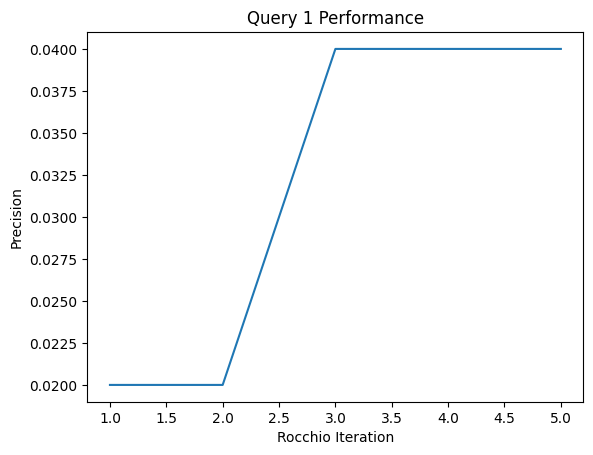

In [58]:
data = np.array(p)
x,y = data.T
plt.title("Query 1 Performance")
plt.xlabel("Rocchio Iteration")
plt.ylabel("Precision")
plt.plot(x, y)
plt.show()

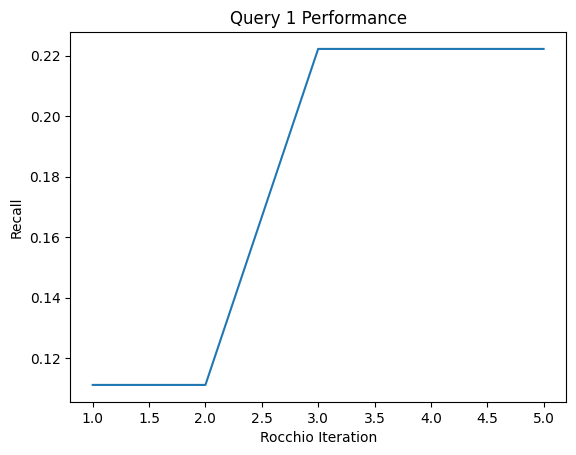

In [59]:
data = np.array(r)
x,y = data.T
plt.title("Query 1 Performance")
plt.xlabel("Rocchio Iteration")
plt.ylabel("Recall")
plt.plot(x, y)
plt.show()

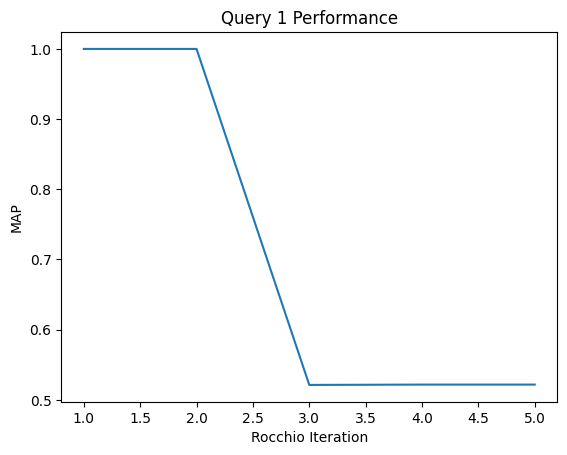

In [60]:
data = np.array(mp)
x,y = data.T
plt.title("Query 1 Performance")
plt.xlabel("Rocchio Iteration")
plt.ylabel("MAP")
plt.plot(x, y)
plt.show()

# Progress so far

In [71]:
a = index("")

Index built in 1.0567257404327393 seconds.
Converting Collection of Documents to Vectors finished in 0.1505887508392334 seconds


In [72]:
def get_queue(path):
    idToQueue = collections.defaultdict(list)

    with open(path) as file:
        line = file.readline()
        while line:
            words = line.split()
            if words and words[0] == "*STOP":
                break
            if words and words[0] == "*FIND":
                query_id = int(words[1])
            else:
                for word in words:   
                    idToQueue[query_id].append(word)
            line = file.readline()
    
    return idToQueue

In [73]:
def get_relevance(path):
    queryToRelatedDocs = collections.defaultdict(list)

    with open(path) as file:
        line = file.readline()
        while line:
            docs = line.split()
            if docs:
                cur_doc = int(docs[0])
                for doc in docs[1:]:
                    queryToRelatedDocs[cur_doc].append(int(doc))
            line = file.readline()

    return queryToRelatedDocs

In [107]:
def get_stats(qId, k):
    idToQueue = get_queue("time/TIME.QUE")
    queryToRelatedDocs = get_relevance("time/TIME.REL")
    p = []
    r = []
    mp = []

    qText = idToQueue[qId]
    qVec = np.array(a.get_query_vector(qText))

    print(f"Query ID: {qId}, Query text: {qText}")
    for i in range(6):
        queryResultArr = a.exact_query_using_vector(qVec, k)
        queryResults = set(queryResultArr)

        relatedDocs = set(queryToRelatedDocs[qId])

        pos_feedback = list(queryResults.intersection(relatedDocs))
        neg_feedback = list(queryResults.difference(relatedDocs))

        print(f"Iterations: {i}")
        print(f"Positive Feedback: {pos_feedback}")
        print(f"Negative Feedback: {neg_feedback}")
        relevant = relatedDocs
        non_relevant = all_documents.difference(relevant)

        retrieved = queryResults
        not_retrieved = all_documents.difference(retrieved)

        tp = relevant.intersection(retrieved)
        fp = non_relevant.intersection(retrieved)
        fn = relevant.intersection(not_retrieved)

        precision = len(tp)/(len(tp) + len(fp))
        recall = len(tp)/(len(tp) + len(fn))

        rCount = 0
        curMap = 0
        for ind, res in enumerate(queryResultArr, 1):
            if res in relevant:
                rCount += 1
                curMap += float(rCount)/float(ind)
        if rCount > 0:
            curMap = curMap/float(rCount)


        p.append([i, precision])
        r.append([i, recall])
        mp.append([i, curMap])

        qVec = a.rocchio(qText, pos_feedback, neg_feedback, alpha=1.0, beta=0.75, gamma=0.15, q=qVec)
        print(f"New Query Vector: {qVec}")

    return [p, r, mp]

In [94]:
p1, r1, mp1 = get_stats(qId = 6,k = 75)

Query ID: 6, Query text: ['CEREMONIAL', 'SUICIDES', 'COMMITTED', 'BY', 'SOME', 'BUDDHIST', 'MONKS', 'IN', 'SOUTH', 'VIET', 'NAM', 'AND', 'WHAT', 'THEY', 'ARE', 'SEEKING', 'TO', 'GAIN', 'BY', 'SUCH', 'ACTS', '.']
Query executed in 2.7184202671051025 seconds.
Iterations: 0
Positive Feedback: [334]
Negative Feedback: [513, 516, 518, 519, 262, 265, 269, 17, 533, 536, 281, 538, 29, 30, 543, 545, 40, 298, 559, 48, 307, 52, 53, 54, 313, 317, 63, 320, 322, 67, 347, 361, 363, 365, 121, 122, 123, 380, 126, 389, 390, 396, 140, 145, 148, 404, 407, 414, 415, 418, 162, 422, 174, 434, 443, 449, 198, 202, 460, 464, 213, 470, 476, 222, 480, 226, 227, 228, 485, 492, 498, 243, 504, 508]
New Query Vector: [-0.0235516  -0.00553378 -0.0096382  ...  0.          0.
  0.        ]
Query executed in 2.610649585723877 seconds.
Iterations: 1
Positive Feedback: [268, 334, 308]
Negative Feedback: [513, 514, 516, 518, 519, 269, 275, 533, 21, 536, 281, 29, 545, 34, 556, 559, 562, 52, 53, 313, 58, 319, 320, 322, 66, 34

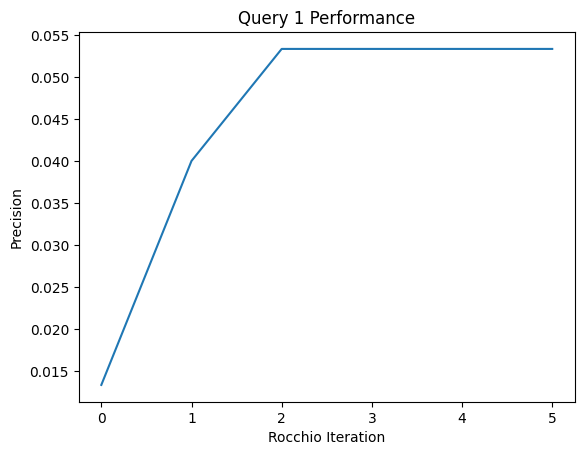

In [118]:
data = np.array(p1)
x,y = data.T
plt.title("Query 1 Performance")
plt.xlabel("Rocchio Iteration")
plt.ylabel("Precision")
plt.plot(x, y)
plt.show()

In [ ]:
data = np.array(r1)
x,y = data.T
plt.title("Query 1 Performance")
plt.xlabel("Rocchio Iteration")
plt.ylabel("Recall")
plt.plot(x, y)
plt.show()

In [ ]:
data = np.array(mp1)
x,y = data.T
plt.title("Query 1 Performance")
plt.xlabel("Rocchio Iteration")
plt.ylabel("MAP")
plt.plot(x, y)
plt.show()

In [109]:
p2, r2, mp2 = get_stats(qId = 9, k=50)

Query ID: 9, Query text: ['OPPOSITION', 'OF', 'INDONESIA', 'TO', 'THE', 'NEWLY-CREATED', 'MALAYSIA', '.']
Query executed in 2.751310110092163 seconds.
Iterations: 0
Positive Feedback: []
Negative Feedback: [256, 514, 389, 261, 133, 519, 523, 402, 284, 413, 414, 288, 548, 422, 552, 299, 427, 430, 303, 176, 304, 306, 562, 51, 434, 443, 189, 63, 321, 67, 196, 203, 204, 335, 463, 476, 94, 479, 350, 356, 359, 237, 110, 111, 369, 498, 502, 503, 123, 511]
New Query Vector: [-0.01152663 -0.00554457 -0.00475484 ...  0.          0.
  0.        ]
Query executed in 2.6406939029693604 seconds.
Iterations: 1
Positive Feedback: []
Negative Feedback: [256, 384, 259, 134, 529, 273, 20, 406, 25, 154, 153, 30, 426, 171, 299, 173, 555, 303, 174, 177, 178, 437, 184, 185, 443, 323, 335, 83, 473, 218, 347, 120, 90, 94, 479, 222, 95, 92, 355, 96, 229, 490, 106, 238, 496, 245, 117, 119, 248, 255]
New Query Vector: [-0.01152663 -0.00554457 -0.00950969 ...  0.          0.
  0.        ]
Query executed in 2.747831

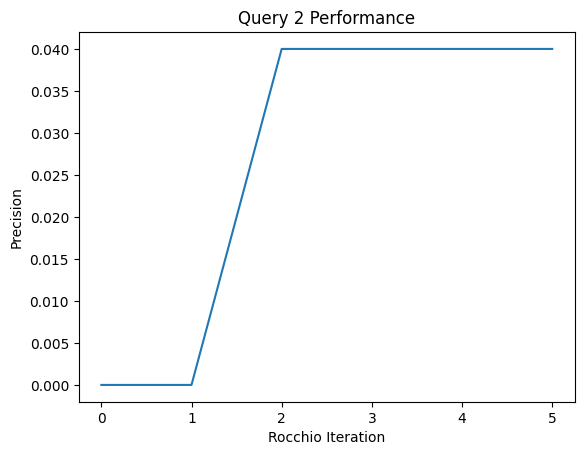

In [119]:
data = np.array(p2)
x,y = data.T
plt.title("Query 2 Performance")
plt.xlabel("Rocchio Iteration")
plt.ylabel("Precision")
plt.plot(x, y)
plt.show()

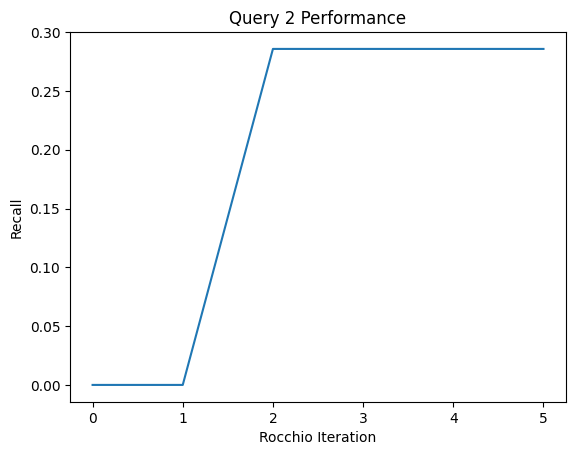

In [120]:
data = np.array(r2)
x,y = data.T
plt.title("Query 2 Performance")
plt.xlabel("Rocchio Iteration")
plt.ylabel("Recall")
plt.plot(x, y)
plt.show()

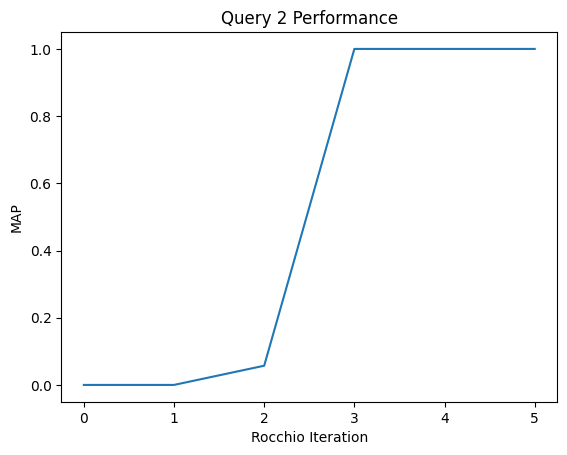

In [121]:
data = np.array(mp2)
x,y = data.T
plt.title("Query 2 Performance")
plt.xlabel("Rocchio Iteration")
plt.ylabel("MAP")
plt.plot(x, y)
plt.show()

In [116]:
p3, r3, mp3 = get_stats(qId = 12, k=50)

Query ID: 12, Query text: ['CONTROVERSY', 'BETWEEN', 'INDONESIA', 'AND', 'MALAYA', 'ON', 'THE', 'PROPOSED', 'FEDERATION', 'OF', 'MALAYSIA,', 'WHICH', 'WOULD', 'UNITE', 'FIVE', 'TERRITORIES', '.']
Query executed in 2.743364095687866 seconds.
Iterations: 0
Positive Feedback: []
Negative Feedback: [256, 128, 258, 389, 396, 140, 398, 525, 402, 404, 407, 540, 157, 414, 413, 163, 299, 303, 183, 312, 442, 187, 443, 444, 60, 63, 192, 321, 71, 72, 202, 203, 204, 332, 335, 464, 463, 86, 215, 94, 479, 224, 99, 101, 104, 232, 109, 239, 243, 121]
New Query Vector: [-0.01896538 -0.01108913 -0.00950969 ...  0.          0.
  0.        ]
Query executed in 2.6328117847442627 seconds.
Iterations: 1
Positive Feedback: []
Negative Feedback: [256, 128, 258, 389, 134, 266, 398, 270, 529, 20, 276, 406, 407, 154, 414, 417, 33, 35, 298, 171, 173, 303, 177, 178, 51, 437, 184, 443, 444, 321, 202, 203, 335, 218, 347, 92, 94, 479, 222, 354, 355, 101, 229, 490, 237, 496, 245, 119, 248, 255]
New Query Vector: [-0.018

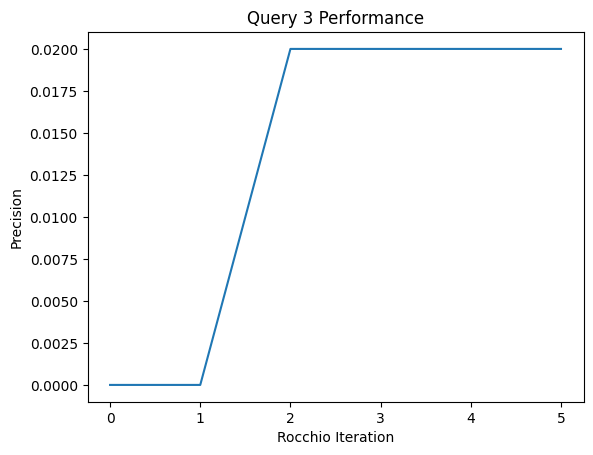

In [122]:
data = np.array(p3)
x,y = data.T
plt.title("Query 3 Performance")
plt.xlabel("Rocchio Iteration")
plt.ylabel("Precision")
plt.plot(x, y)
plt.show()

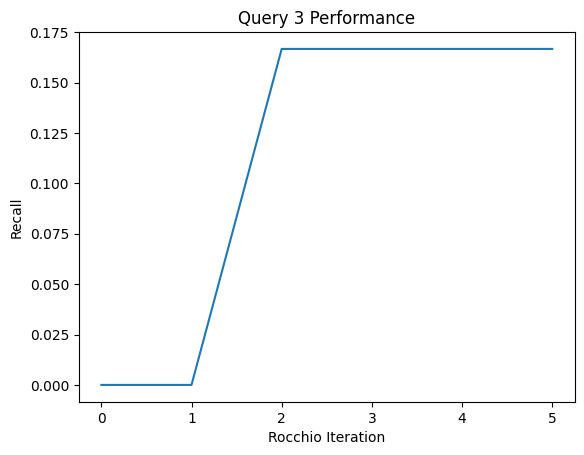

In [123]:
data = np.array(r3)
x,y = data.T
plt.title("Query 3 Performance")
plt.xlabel("Rocchio Iteration")
plt.ylabel("Recall")
plt.plot(x, y)
plt.show()

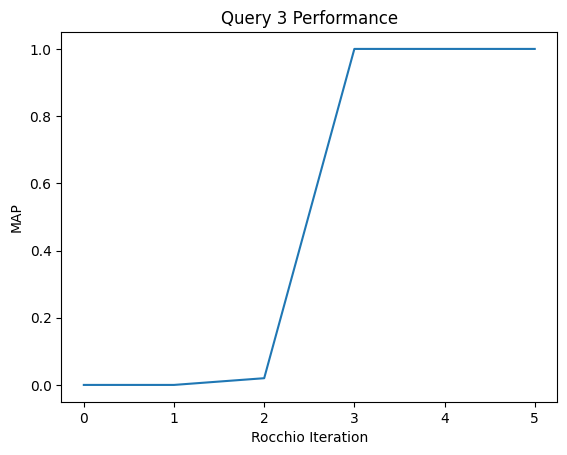

In [124]:
data = np.array(mp3)
x,y = data.T
plt.title("Query 3 Performance")
plt.xlabel("Rocchio Iteration")
plt.ylabel("MAP")
plt.plot(x, y)
plt.show()

In [1]:
from index import index

In [2]:
a = index("")

Index built in 0.5520198345184326 seconds.
Converting Collection of Documents to Vectors finished in 0.2206275463104248 seconds


In [3]:
p, q, mp = a.get_stats(qId = 6, k=50)

Query ID: 6, Query text: ['CEREMONIAL', 'SUICIDES', 'COMMITTED', 'BY', 'SOME', 'BUDDHIST', 'MONKS', 'IN', 'SOUTH', 'VIET', 'NAM', 'AND', 'WHAT', 'THEY', 'ARE', 'SEEKING', 'TO', 'GAIN', 'BY', 'SUCH', 'ACTS', '.']
Query executed in 2.740351676940918 seconds.
Iterations: 0
Positive Feedback: [334]
Negative Feedback: [389, 390, 518, 519, 265, 396, 269, 140, 145, 148, 533, 404, 407, 536, 281, 538, 29, 414, 415, 545, 418, 40, 298, 559, 48, 434, 52, 53, 54, 313, 320, 449, 322, 198, 202, 464, 470, 347, 480, 226, 227, 228, 361, 363, 492, 498, 243, 504, 508]
New Query Vector: [-0.00819877  0.         -0.00485188 ...  0.          0.
  0.        ]
Query executed in 2.710577964782715 seconds.
Iterations: 1
Positive Feedback: [334]
Negative Feedback: [513, 516, 390, 518, 519, 396, 269, 144, 148, 533, 21, 536, 408, 281, 29, 414, 415, 158, 545, 418, 34, 163, 422, 559, 176, 434, 562, 52, 53, 313, 319, 320, 322, 66, 202, 464, 470, 348, 480, 226, 228, 234, 363, 110, 498, 370, 252, 508, 381]
New Query Vec